In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
# Load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# Load a list of files and return as a 3D numpy array
def load_group(filenames, prefix='D:/가천대학교 3-2/딥러닝/human+activity+recognition+using+smartphones/UCI HAR Dataset/'):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    return np.dstack(loaded)

# Load a dataset group, such as train or test
def load_dataset_group(group, prefix='D:/가천대학교 3-2/딥러닝/human+activity+recognition+using+smartphones/UCI HAR Dataset/'):
    filepath = prefix + group + '/Inertial Signals/'
    filenames = list()
    # Total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # Body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # Body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # Load input data
    X = load_group(filenames, filepath)
    # Load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

# Load the dataset, returns train and test X and y elements
def load_dataset(prefix='D:/가천대학교 3-2/딥러닝/human+activity+recognition+using+smartphones/'):
    # Load all train
    trainX, trainy = load_dataset_group('train', prefix + 'UCI HAR Dataset/')
    # Load all test
    testX, testy = load_dataset_group('test', prefix + 'UCI HAR Dataset/')
    # Zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # One-hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print("trainX shape: ", trainX.shape)
    print("trainy shape: ", trainy.shape)
    print("testX shape: ", testX.shape)
    print("testy shape: ", testy.shape)
    return trainX, trainy, testX, testy

In [3]:
# Load the dataset
trainX, trainy, testX, testy = load_dataset()

trainX shape:  (7352, 128, 9)
trainy shape:  (7352, 6)
testX shape:  (2947, 128, 9)
testy shape:  (2947, 6)


In [4]:
from tensorflow.keras.layers import GRU

n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(GRU(100, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))


In [5]:
# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Fit the model
batch_size = 64
train_epochs = 10
history = model.fit(trainX, trainy, epochs=train_epochs, batch_size=batch_size, verbose=True, validation_split=0.2)

Epoch 1/10
92/92 [==============================] - 15s 132ms/step - loss: 1.2448 - accuracy: 0.4770 - val_loss: 1.1480 - val_accuracy: 0.5105
Epoch 2/10
92/92 [==============================] - 20s 213ms/step - loss: 0.9750 - accuracy: 0.5841 - val_loss: 0.9521 - val_accuracy: 0.6540
Epoch 3/10
92/92 [==============================] - 18s 196ms/step - loss: 0.7208 - accuracy: 0.6999 - val_loss: 0.5341 - val_accuracy: 0.8117
Epoch 4/10
92/92 [==============================] - 13s 143ms/step - loss: 0.4354 - accuracy: 0.8335 - val_loss: 0.3921 - val_accuracy: 0.8668
Epoch 5/10
92/92 [==============================] - 12s 135ms/step - loss: 0.2605 - accuracy: 0.9041 - val_loss: 0.3268 - val_accuracy: 0.8722
Epoch 6/10
92/92 [==============================] - 12s 133ms/step - loss: 0.2106 - accuracy: 0.9265 - val_loss: 0.3174 - val_accuracy: 0.8912
Epoch 7/10
92/92 [==============================] - 19s 205ms/step - loss: 0.1763 - accuracy: 0.9376 - val_loss: 0.2896 - val_accuracy: 0.9041

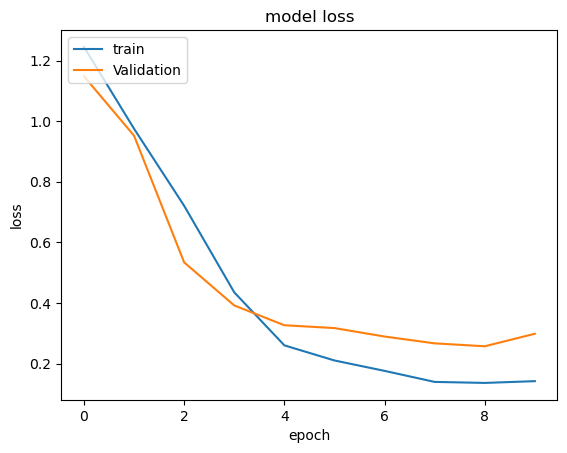

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("Accuracy of the BiLSTM model:", test_accuracy)
# Get the predictions for the test set
predictions = model.predict(testX)

Accuracy of the BiLSTM model: 0.8903970122337341
93/93 [==============================] - 5s 47ms/step


In [9]:
predictions

array([[1.5579249e-01, 6.0064642e-04, 8.7049833e-05, 1.0562383e-03,
        8.4246331e-01, 2.2293543e-07],
       [2.6417416e-02, 2.3183727e-04, 4.6186549e-05, 2.2823338e-03,
        9.7102207e-01, 2.7605063e-07],
       [2.1707477e-02, 1.9362557e-04, 3.7244597e-05, 2.2867962e-03,
        9.7577465e-01, 2.4986105e-07],
       ...,
       [3.2877168e-04, 9.9966276e-01, 8.4513731e-06, 1.6305709e-11,
        4.6610459e-08, 7.2986467e-10],
       [3.5591426e-04, 9.9963677e-01, 7.2033231e-06, 2.6188203e-11,
        7.5080997e-08, 1.3739111e-09],
       [7.1705005e-04, 9.9927455e-01, 8.1152430e-06, 1.2031348e-10,
        2.3705100e-07, 3.6740919e-09]], dtype=float32)

In [10]:
# Confusion Matrix
def display_results(testy,predictions,classNames):
    y_test=np.argmax(testy, axis=1)
    y_scores=np.argmax(predictions, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y] #/np.sum(cm[x,:])

    plt.figure(figsize=(10,8))
    df = sns.heatmap(con, annot=True, fmt='g', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**** Confusion Matrix ****
[[469  23   4   0   0   0]
 [ 20 446   5   0   0   0]
 [ 11  21 388   0   0   0]
 [ 25   2   0 389  75   0]
 [ 28   0   0  82 422   0]
 [  0  17  10   0   0 510]]
**** Classification Report ****
              precision    recall  f1-score   support

           1       0.85      0.95      0.89       496
           2       0.88      0.95      0.91       471
           3       0.95      0.92      0.94       420
           4       0.83      0.79      0.81       491
           5       0.85      0.79      0.82       532
           6       1.00      0.95      0.97       537

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



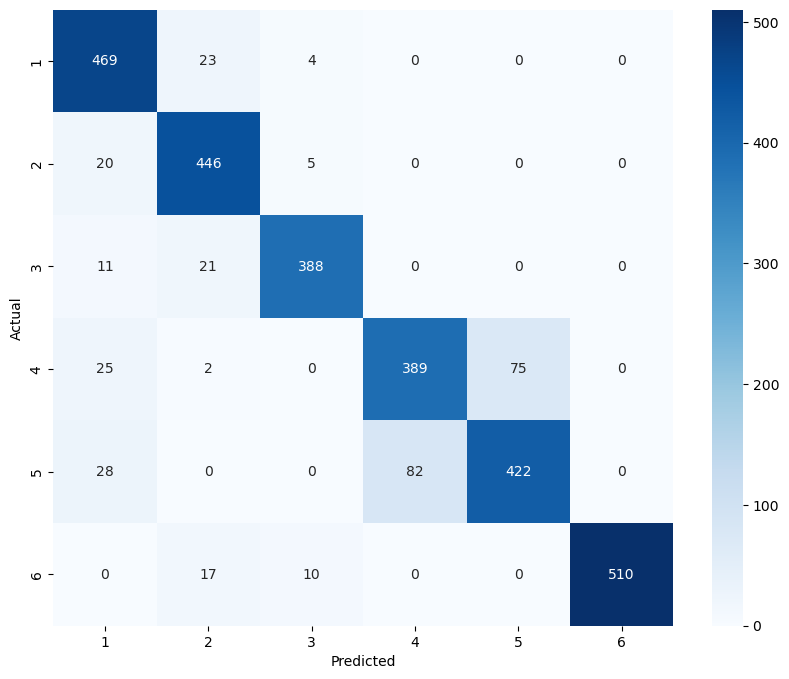

In [11]:
classNames=["1","2","3","4","5","6"]
display_results(testy,predictions,classNames)